<h1><strong>Montando uma College List com Python.</strong></h1>
<h5>Faremos uma análise das melhores 1000 universidades para montarmos uma College List para um aluno fictício utilizando Python!
</h5>
<h2>Apresentação da situação problema.</h2>
<p>Faala, dev! Pegue seu café, limpe seus óculos, porque a situação problema de hoje é a seguinte: Temos um aluno fictício iniciando o seu Ensino Médio já preocupado com seu futuro acadêmico. Ele precisa montar sua College List, ou seja, sua lista de universidades desejadas, para já ir se preparando para os processos seletivos.</p>
<br>
Entendido o nosso problema, vamos codar!
<br>
<h2>Importação e limpeza dos dados!</h2>

Para começarmos, vamos importar a base de dados e as bibliotecas Pandas e Matplotlib:


In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('2020-QS-World-University-Rankings.csv',encoding = 'ISO-8859-1')

<p>“Poxa, Victor, mas eu nem vi a base de dados, bora dar uma olhadinha?” Seu pedido é uma ordem, vamos ver as 5 primeiras linhas da base de dados para termos uma ideia das variáveis que iremos analisar:</p>

In [17]:
df.head()

,Rank in 2020,Rank in 2019,Institution Name,Country,Classification,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Academic Reputation,Unnamed: 10,Employer Reputation,Unnamed: 12,Faculty Student,Unnamed: 14,Citations per Faculty,Unnamed: 16,International Faculty,Unnamed: 18,International Students,Unnamed: 20,Overall Score
0,NaN,NaN,NaN,NaN,SIZE,FOCUS,RESEARCH INTENSITY,AGE,STATUS,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,NaN
1,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,5,100,4,100,15,99.8,7,100,43,94.1,87,100
2,2,2,Stanford University,United States,L,FC,VH,5,B,100,4,100,5,100,12,98.6,13,99.8,62,67.7,196,98.4
3,3,3,Harvard University,United States,L,FC,VH,5,B,100,1,100,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
4,4,5,University of Oxford,United Kingdom,L,FC,VH,5,A,100,3,100,3,100,8,84.7,45,99.7,64,98.5,50,97.2


<p>Veja que temos muitas colunas que não são interessante para nosso caso e muitas com nomes errados ou até sem nome. Dessa forma, vamos fazer uma limpeza nesses dados, selecionando apenas as colunas mais interessantes para nossa análise e renomeando-as para melhor compreensão:</p>

In [18]:
df = df.rename(columns={'Rank in 2020':'rank','International Students':'international','Academic Reputation':'reputation',})
df = df.loc[:,df.columns.isin(['rank','international','reputation','Country','Classification','Institution Name'])]
df

,rank,Institution Name,Country,Classification,reputation,international
0,NaN,NaN,NaN,SIZE,SCORE,SCORE
1,1,Massachusetts Institute of Technology (MIT),United States,M,100,94.1
2,2,Stanford University,United States,L,100,67.7
3,3,Harvard University,United States,L,100,62.2
4,4,University of Oxford,United Kingdom,L,100,98.5
...,...,...,...,...,...,...
1020,NaN,Université Sorbonne Nouvelle Paris 3,France,L,37.7,98.5
1021,NaN,"University of California, San Francisco (UCSF)",United States,S,45.6,-
1022,NaN,"University of Economics, Prague",Czech Republic,L,-,43.9
1023,NaN,Weizmann Institute of Science,Israel,S,20.8,NaN


<p>Bem melhor, né? NÃO, PERA! Mas o que são esses NaN’s? Bem esses NaN’s são dados faltantes, para uma limpeza de dados mais eficaz nós devemos remove-los:</p>

In [19]:
df = df.dropna()
df

,rank,Institution Name,Country,Classification,reputation,international
1,1,Massachusetts Institute of Technology (MIT),United States,M,100,94.1
2,2,Stanford University,United States,L,100,67.7
3,3,Harvard University,United States,L,100,62.2
4,4,University of Oxford,United Kingdom,L,100,98.5
5,5,California Institute of Technology (Caltech),United States,S,97.8,87.3
...,...,...,...,...,...,...
998,801-1000,Warsaw University of Life Sciences,Poland,L,-,-
999,801-1000,Wroc?aw University of Science and Technology,Poland,L,-,-
1000,801-1000,Wuhan University of Technology,China,XL,-,-
1001,801-1000,Xi'an Jiaotong-Liverpool University,China,M,-,-


<p>Finalmente! Agora, nossos dados estão bacanas, com apenas o essencial para essa análise e sem “dados sujos”, que atrapalhariam nossa análise.</p>

<h2>Explorando os dados!</h2>
<p>Tendo em mente que os processos seletivos universitários de cada país são muito diferentes, é interessante começarmos nossa exploração restringindo a College List à alguns países. Para tal critério veremos quais países tem mais universidades nesse ranking das melhores 1000 universidades do mundo:</p>

Text(0, 0.5, '')

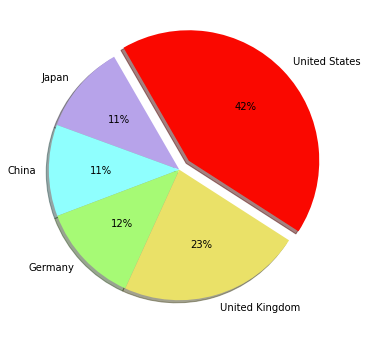

In [20]:
space = [0,0,0,0,0.1]
mycolors = ['#B7A3EA','#8FFFFE','#A6FA75','#EAE168','#FA0800']
valores = df.groupby('Country').Classification.count().sort_values().tail()
plt.figure()
df.groupby('Country').Classification.count().sort_values().tail().plot.pie(figsize=(6,6),shadow=True,startangle=120,explode=space,colors=mycolors,autopct='%1.f%%')
plt.ylabel('')

<p>Bem, vemos que Estados Unidos e Reino Unido são grandes concorrentes para estar no nosso radar. Esse gráfico deu uma boa reduzida nas opções. No entanto nosso aluno está tão entusiasmado que acabou de nos mandar um e-mail avisando que quer aplicar para universidades que estejam no top 100 melhores universidades do mundo.</p>
<br>
<p>Dessa forma, vamos recriar esse gráfico com apenas as 100 melhores universidades para filtrarmos os países:</p>

Text(0, 0.5, '')

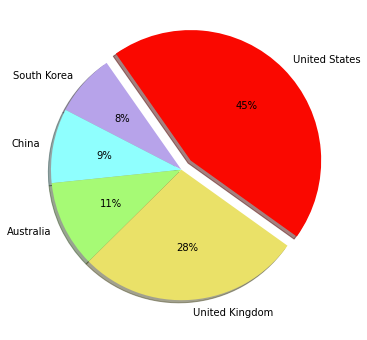

In [21]:
df.iloc[:100].groupby('Country').Classification.count().sort_values().tail().plot.pie(figsize=(6,6),shadow=True,startangle=125,explode=space,colors=mycolors,autopct='%1.f%%')
plt.ylabel('')

<p>Agora sim! E nota-se que o países mudaram. Bem, o processo seletivo desses 5 países são bem diferentes, no entanto, algo que nós usaremos parar filtrar será a língua. Temos 3 países que falam inglês, logo é muito mais interessante nosso aluno aprender apenas o inglês e poder aplicar para os três países com maior quantidade de universidade no top 100 do que nosso aluno aprender Mandarim e Koreano.</p>
<br>
<p>Então, com base na língua filtraremos agora as universidades que residam nos EUA, Reino Unido ou Australia:</p>

In [22]:
meus_paises = np.array(['United States','United Kingdom','Australia'])
df = df.iloc[:100]
df = df.loc[df.Country.isin(meus_paises)]
df.head()

,rank,Institution Name,Country,Classification,reputation,international
1,1,Massachusetts Institute of Technology (MIT),United States,M,100,94.1
2,2,Stanford University,United States,L,100,67.7
3,3,Harvard University,United States,L,100,62.2
4,4,University of Oxford,United Kingdom,L,100,98.5
5,5,California Institute of Technology (Caltech),United States,S,97.8,87.3


<p>Exibimos apenas o top 5 para ficar mais fácil de visualizar. “Victor, qual próximo criterio eliminatório que seria bom a gente usar?”. Bem, talvez, já que nosso aluno está focado nesse processo, nós podíamos selecionar apenas as universidades que estejam acima da média das universidades restante de cada país no quesito reputação, ou seja, as mais renomadas de cada país.</p>
<br>
<p>Calculando as médias de cada países:</p>

In [23]:
df.reputation = pd.to_numeric(df.reputation)
df.groupby('Country').reputation.mean()

Country
Australia         89.100000
United Kingdom    77.255556
United States     88.110345
Name: reputation, dtype: float64

Guardando as médias:

In [24]:
medias_reputacoes = pd.Series([89.0,79.0,88.0]) #Australia United Kingdom EUA
medias_reputacoes

0    89.0
1    79.0
2    88.0
dtype: float64

Agora, nós selecionaremos apenas as universidades com reputações acima das médias calculadas para cada país:

In [25]:
df = df.loc[
    ((df.Country == 'Australia') & (df.reputation > medias_reputacoes[0]))                  
| ((df.Country == 'United Kingdom') & (df.reputation > medias_reputacoes[1]))
| ((df.Country == 'United States') & (df.reputation > medias_reputacoes[2]))
]
df.head()

,rank,Institution Name,Country,Classification,reputation,international
1,1,Massachusetts Institute of Technology (MIT),United States,M,100.0,94.1
2,2,Stanford University,United States,L,100.0,67.7
3,3,Harvard University,United States,L,100.0,62.2
4,4,University of Oxford,United Kingdom,L,100.0,98.5
5,5,California Institute of Technology (Caltech),United States,S,97.8,87.3


<p>Aqui, nós motramos apenas 5 universidades, não é a quantidade total. “Mas, Victor, uma College List tem, mais ou menos 10 universidades, quantas restaram?”. Boa! vou te mostrar agora:</p>

In [26]:
df.shape

(30, 6)

<p>Ou seja, temos 30 universidades ainda. “Victor, qual será o próximo requisito usado?”. Você está animadinho, hein? Contudo, para esse caso não é interessante usarmos apenas os números para tomar a decisão, pois o fit cultural também é muito importante. Por exemplo, Harvard está na lista, mas talvez a cultura que haja em Harvard não é muito compatível com os valores do nosso aluno.</p>
<p>Dessa maneira, o melhor a se fazer é entregar essa lista com as 30 melhores universidades que encontramos usando aqueles critérios e ele, de forma autônoma, escolher quais dessas universidades “são mais a sua cara”.
</p>

<h1>Conclusão</h1>
<p>Dev, seu café provavelmente já secou, seu óculos embaçou e nós concluímos nossa análise. Nós pegamos as 1000 melhores universidades e selecionamos apenas 30 com várias metodologias de forma lógica utilitzando Python com a trindade da análise de dados: Pandas, Numpy e Matplotlib.</p>